In [6]:
# !kaggle competitions download -c playground-series-s4e9


  0%|          | 0.00/7.84M [00:00<?, ?B/s]
 13%|█▎        | 1.00M/7.84M [00:01<00:11, 646kB/s]
 26%|██▌       | 2.00M/7.84M [00:01<00:04, 1.26MB/s]
 38%|███▊      | 3.00M/7.84M [00:02<00:02, 2.02MB/s]
 51%|█████     | 4.00M/7.84M [00:02<00:01, 2.75MB/s]
 64%|██████▍   | 5.00M/7.84M [00:02<00:00, 3.64MB/s]
 77%|███████▋  | 6.00M/7.84M [00:02<00:00, 4.11MB/s]
 89%|████████▉ | 7.00M/7.84M [00:02<00:00, 4.87MB/s]
100%|██████████| 7.84M/7.84M [00:02<00:00, 5.23MB/s]
100%|██████████| 7.84M/7.84M [00:02<00:00, 2.93MB/s]


In [1]:
import pandas as pd

from analytic_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analytic_src.basic_data_inspection import DataInspector, SummaryInspectionStrategy, DataTypesInspectionStrategy
from analytic_src.univariate_analysis import UniVariateAnalysis, NumericalUniVariateAnalysis, CategoricalUniVariateAnalysis
from analytic_src.bivariate_analysis import BivariateAnalysis, NumericalVsNumericalBivariateAnalysis, CategoricalVsNumericalBivariateAnalysis
from analytic_src.multivariate_analysis import MultiVariateAnalysis, SimpleMultiVariateAnalysis

pd.set_option("display.max_rows", 100)

In [2]:
train_path = "../extracted_data/train.csv"
test_path = "../extracted_data/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [3]:
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(train_df)


Data types and Non-Null Count
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
None


Null Count
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine      

In [4]:
144514 / 188533

0.766518328356309

In [5]:
data_inspector.set_strategy(SummaryInspectionStrategy())
data_inspector.execute_inspection(train_df)


Summary Statistics


                  id     model_year         milage         price
count  188533.000000  188533.000000  188533.000000  1.885330e+05
mean    94266.000000    2015.829998   65705.295174  4.387802e+04
std     54424.933488       5.660967   49798.158076  7.881952e+04
min         0.000000    1974.000000     100.000000  2.000000e+03
25%     47133.000000    2013.000000   24115.000000  1.700000e+04
50%     94266.000000    2017.000000   57785.000000  3.082500e+04
75%    141399.000000    2020.000000   95400.000000  4.990000e+04
max    188532.000000    2024.000000  405000.000000  2.954083e+06


         brand      model fuel_type  \
count   188533     188533    183450   
unique      57       1897         7   
top       Ford  F-150 XLT  Gasoline   
freq     23088       2945    165940   

                                              engine transmission ext_col  \
count                                         188533       188533  188533   
unique                                   

Missing Values
fuel_type       5083
accident        2452
clean_title    21419
dtype: int64

visualizing missing values


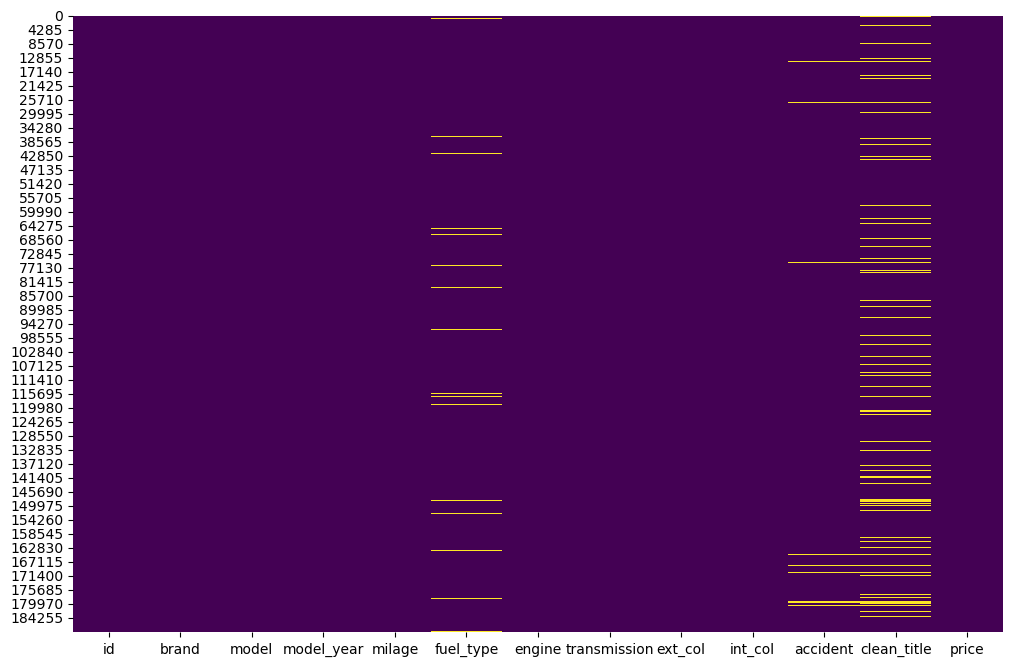

In [6]:
SimpleMissingValuesAnalysis().analysis(train_df)

In [7]:
num_cols = [col for col in train_df.columns if train_df[col].dtype != "O"]
cat_cols = [col for col in train_df.columns if col not in num_cols]

print(num_cols)
print(cat_cols)

['id', 'model_year', 'milage', 'price']
['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


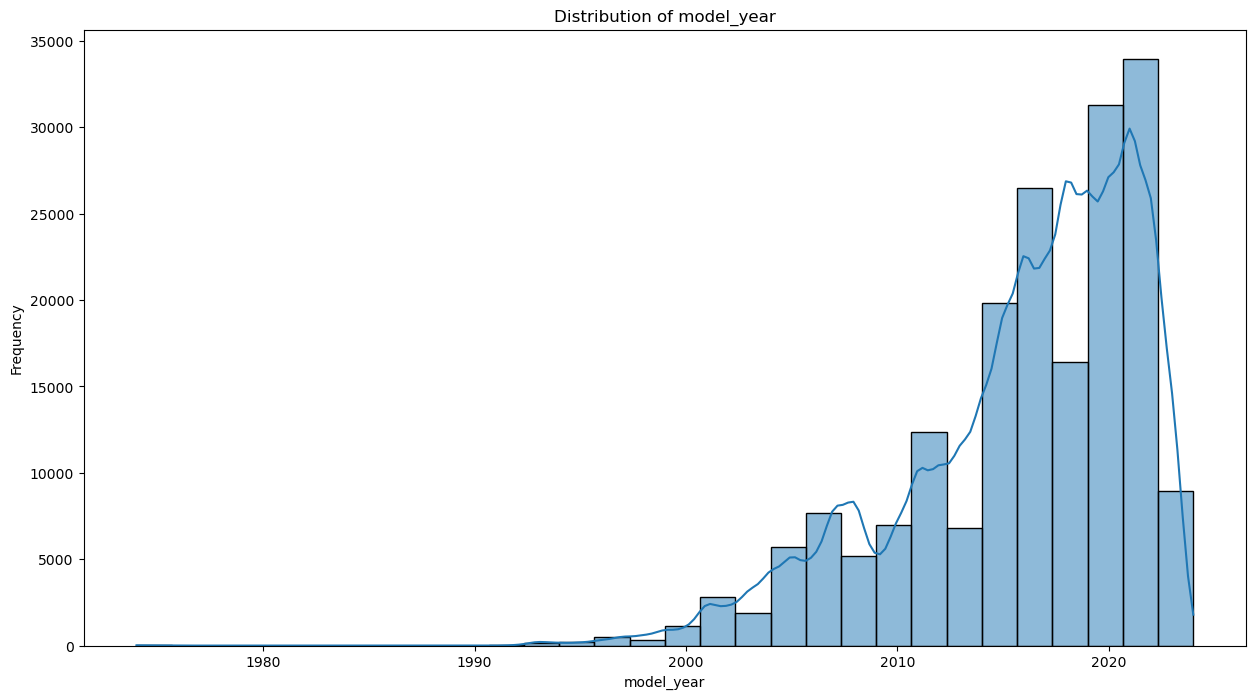

In [8]:
univariate_analyser = UniVariateAnalysis(NumericalUniVariateAnalysis())
univariate_analyser.execute_analysis(train_df, "model_year")

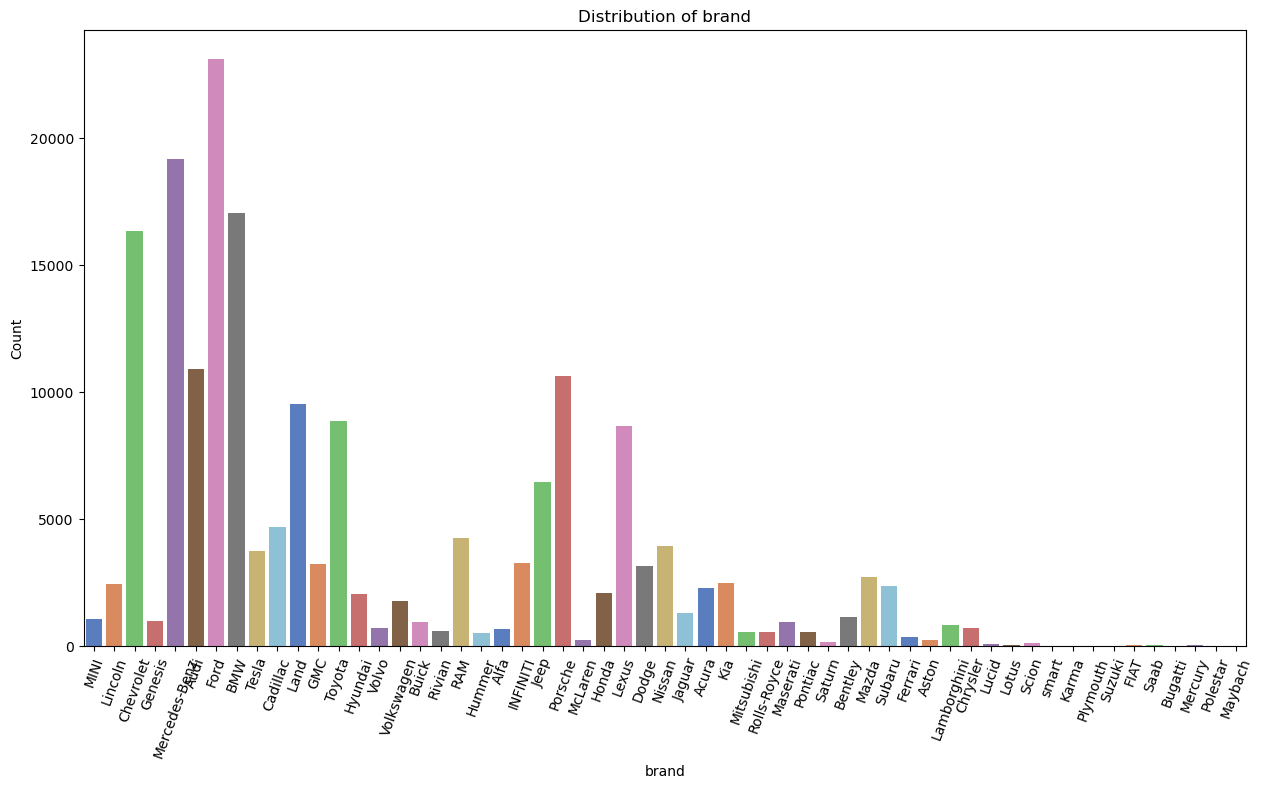

In [9]:
univariate_analyser.set_analyser(CategoricalUniVariateAnalysis())
univariate_analyser.execute_analysis(train_df, "brand")

applied for filter max f2 value | value: 500000
Original shape: (188533, 13) | Updated shape: (188181, 13)


<Figure size 1200x600 with 0 Axes>

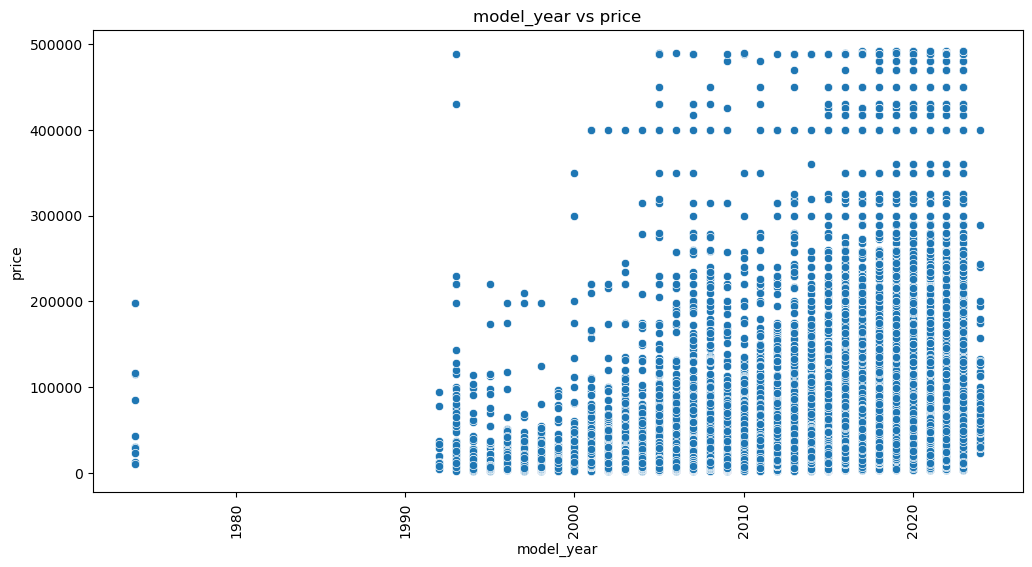

In [10]:
bivariate_analyser = BivariateAnalysis(NumericalVsNumericalBivariateAnalysis())
bivariate_analyser.execute_analysis(train_df, "model_year", "price", max_f2_value=500000, verbose=True) # capping the price upto 500k

applied for filter max f2 value | value: 500000
Original shape: (188533, 13) | Updated shape: (188181, 13)


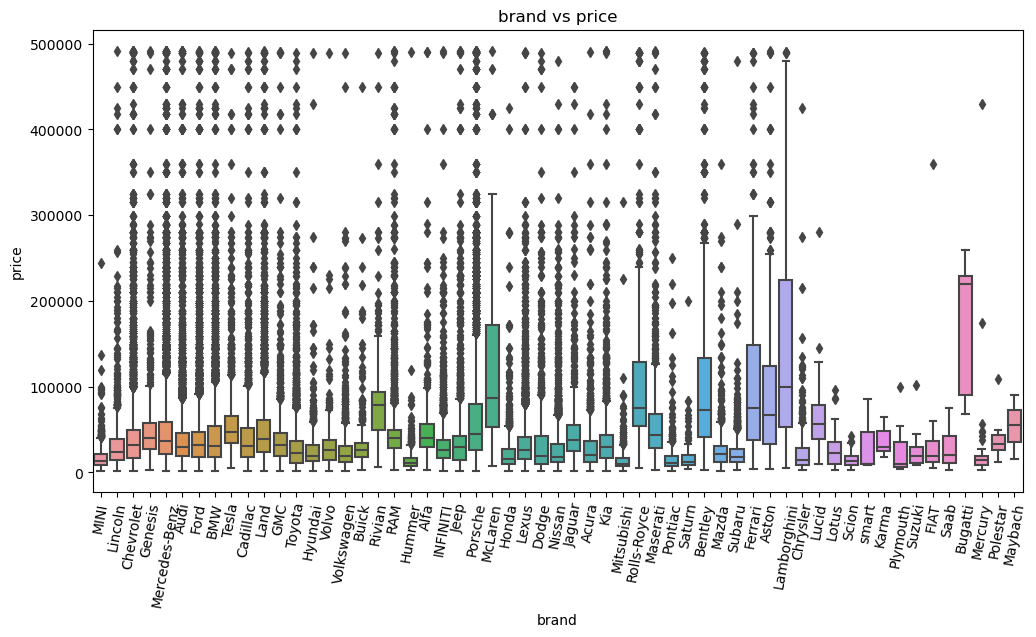

In [11]:
bivariate_analyser.set_analyser(CategoricalVsNumericalBivariateAnalysis())
# ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
bivariate_analyser.execute_analysis(train_df, "brand", 'price', max_f2_value=500000, verbose=True) # capping the price upto 500000 for better visuals

In [21]:
abt = train_df.sample(frac=0.0003) # for the shape of capturing a shape using fewer data for better visuals
abt.shape

(57, 13)

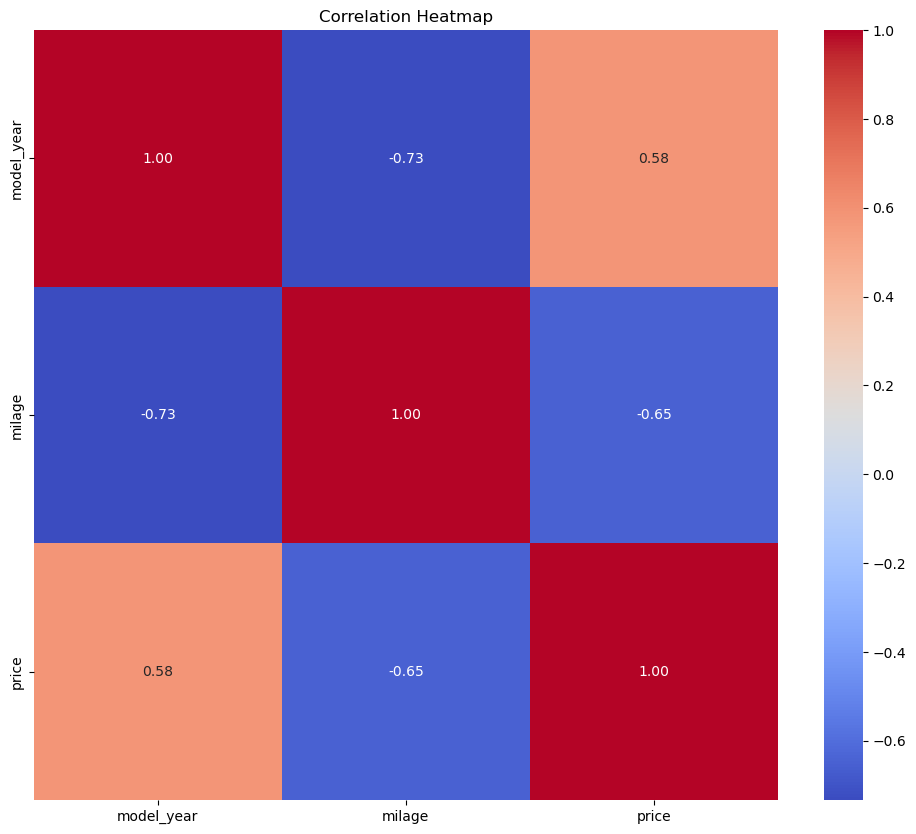

C:\Users\dasha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


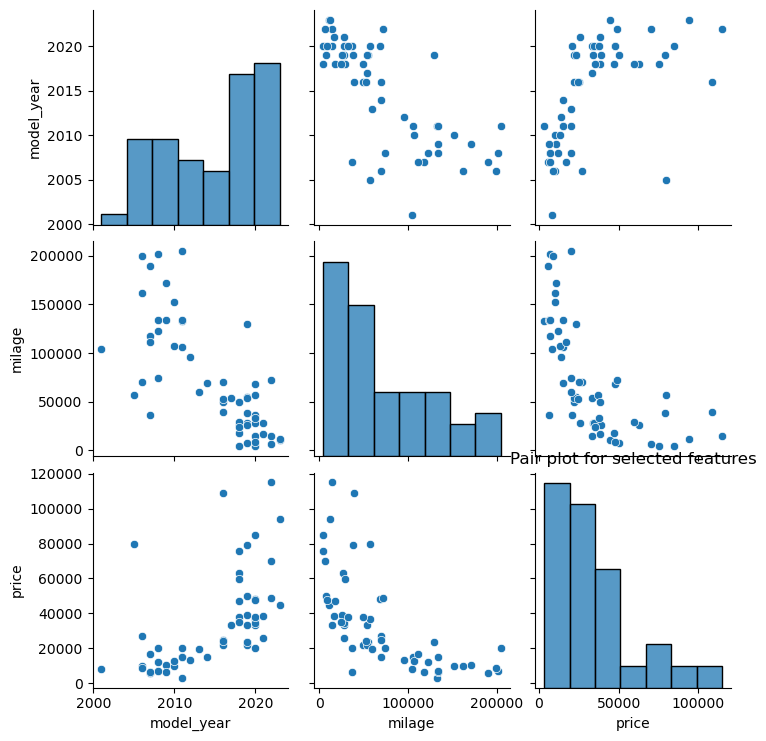

In [22]:
multivariate_analyser = MultiVariateAnalysis(SimpleMultiVariateAnalysis())
multivariate_analyser.execute_analysis(abt.drop('id', axis=1))

# Basic data Inspection:
    - there are lots of outliers in "milage" and "price"(target) as well
    - some catagorical columns have too many unique values like "model" (1897), "engine" (1117), "ext_col" (319), "int_col" (156)
      while two cols - "brand" (57), "transmission" (52) and the rest have less than 8
    - missing values are in "clean_title" (11.3%), "accident" (1.3%), "fuel_type" (2.6%)
    - there are slight similar patter in missing values in "clean_title" while rest are random
    - only ONE unique value in "clean_title" that is "yes"
    - there are largely imbalanced features: 
        fuel_type - Gasoline: 88%
        int_col - Black: 57%
        accident - None Reported: 76.6%
    
# Univariate Analysis:
    - positively skewed features are - "milage", "price" (target), 
    - negetively skewd feature - "model_year"
    - in "transmission" many values have almost zero counts
    - in "brand" the same follows but few

# Bivariate Analysis:
    - numerical features do NOT show much co-relation with target ("price")
    - there are lots of outliers in both catagorical and numerical features

In [12]:
train_df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')